#BIBLIOTECAS NECESSÁRIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from wordcloud import WordCloud
from tensorflow.keras.layers import TextVectorization

#ANALISE EXPLORATÓRIA

In [2]:
#Importando o dataset
data = pd.read_csv("https://raw.githubusercontent.com/americanas-tech/b2w-reviews01/main/B2W-Reviews01.csv", low_memory=False)

In [3]:
#Primeiras 10 colunas
data.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [4]:
#Colunas
data.columns

Index(['submission_date', 'reviewer_id', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'overall_rating', 'recommend_to_a_friend',
       'review_text', 'reviewer_birth_year', 'reviewer_gender',
       'reviewer_state'],
      dtype='object')

In [5]:
#Informações das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1), object(12)


In [6]:
#Estatísticas das variáveis numéricas
data.describe()

,overall_rating,reviewer_birth_year
count,132373.000000,126389.000000
mean,3.492004,1977.495898
std,1.530289,21.895265
min,1.000000,59.000000
25%,2.000000,1969.000000
50%,4.000000,1980.000000
75%,5.000000,1987.000000
max,5.000000,2018.000000


In [7]:
#Valores nulos por coluna
data.isnull().sum()

submission_date              0
reviewer_id                  0
product_id                   0
product_name                84
product_brand            91391
site_category_lv1            6
site_category_lv2         4013
review_title               302
overall_rating               0
recommend_to_a_friend       18
review_text               3275
reviewer_birth_year       5984
reviewer_gender           4136
reviewer_state            3991
dtype: int64

In [8]:
#Valores únicos por coluna
data.nunique()

submission_date          129927
reviewer_id              112993
product_id                48001
product_name              47363
product_brand              1062
site_category_lv1            54
site_category_lv2           713
review_title              56555
overall_rating                5
recommend_to_a_friend         2
review_text              126724
reviewer_birth_year         115
reviewer_gender               2
reviewer_state               27
dtype: int64

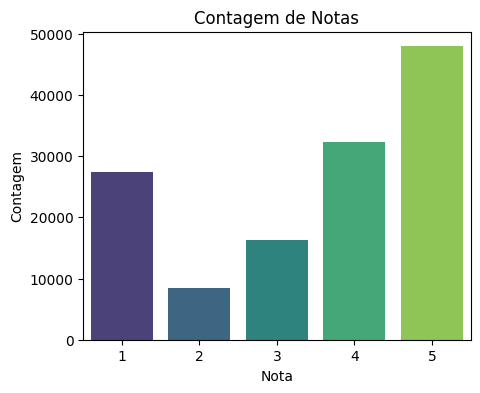

In [9]:
#Contagem de notas
contagem_notas = data['overall_rating'].value_counts()
plt.figure(figsize=(5, 4))
sns.barplot(x=contagem_notas.index, y=contagem_notas.values, palette='viridis')
plt.title('Contagem de Notas')
plt.xlabel('Nota')
plt.ylabel('Contagem')
plt.show()

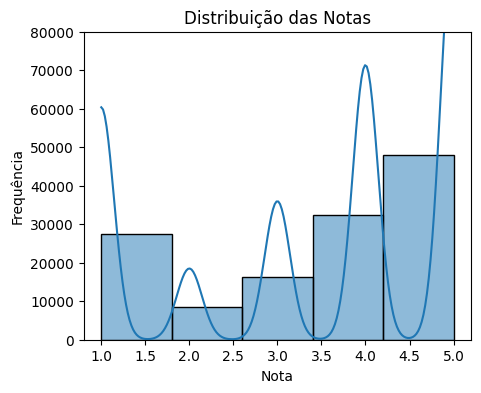

In [10]:
#Distribuição das notas
plt.figure(figsize=(5, 4))
sns.histplot(data['overall_rating'], bins=5, kde=True)
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.ylim(0, 80000)
plt.show()

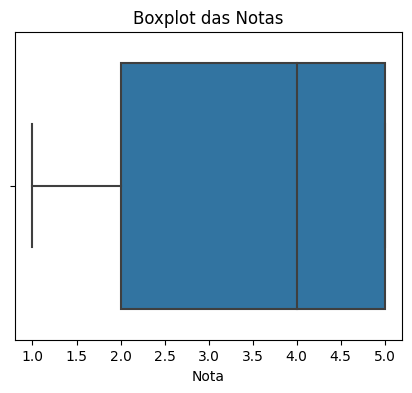

In [11]:
#Boxplot das notas
plt.figure(figsize=(5, 4))
sns.boxplot(x=data['overall_rating'])
plt.title('Boxplot das Notas')
plt.xlabel('Nota')
plt.show()

<ipython-input-12-53c048a0bee8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


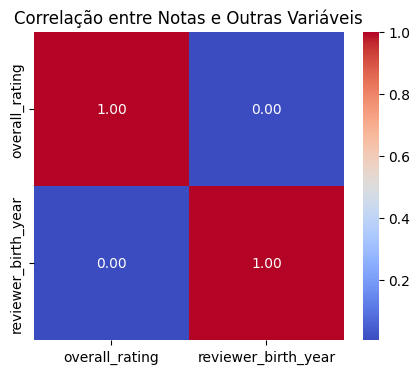

In [12]:
#Correlação das variáveis
correlation_matrix = data.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Notas e Outras Variáveis')
plt.show()

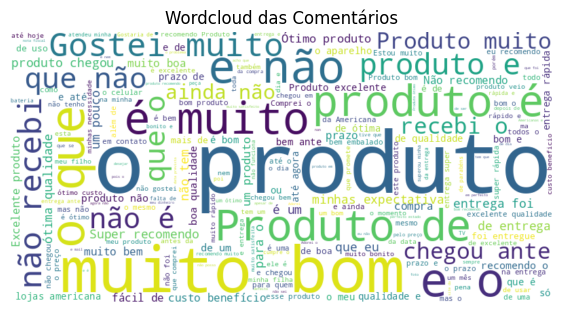

In [13]:
#Wordcloud avaliações
comment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['review_text'].astype(str)))
plt.figure(figsize=(7, 5))
plt.imshow(comment_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud das Comentários')
plt.show()

In [14]:
#Separando avaliações positivas e negativas
positivos = data[data['overall_rating'] > 3]['review_text']
negativos = data[data['overall_rating'] < 3]['review_text']

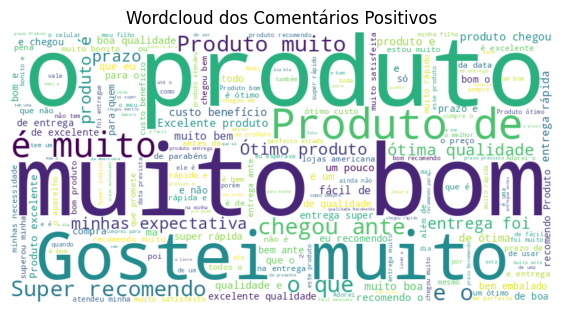

In [15]:
#Wordcloud avaliações positivas
comment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positivos.astype(str)))
plt.figure(figsize=(7, 5))
plt.imshow(comment_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud dos Comentários Positivos')
plt.show()

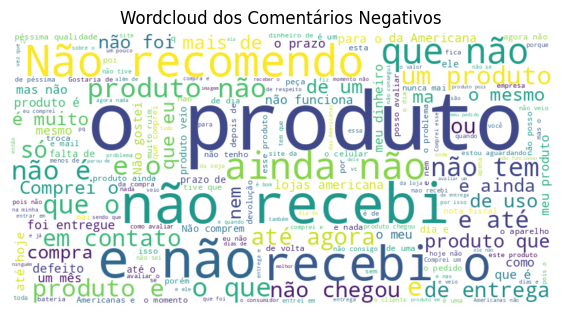

In [16]:
#Wordcloud avaliações negativas
comment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negativos.astype(str)))
plt.figure(figsize=(7, 5))
plt.imshow(comment_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud dos Comentários Negativos')
plt.show()

#PREPARAÇÃO DOS DADOS

##TRANSFORMAÇÃO

In [17]:
#Criando um novo dataset
df = data[["overall_rating", "review_text"]]

In [18]:
#Criando coluna "sentimento"
df["sentimento"] = df["overall_rating"].apply(lambda x: 'positivo' if x > 3 else 'negativo')

<ipython-input-18-0e46540d1c1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentimento"] = df["overall_rating"].apply(lambda x: 'positivo' if x > 3 else 'negativo')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall_rating  132373 non-null  int64 
 1   review_text     129098 non-null  object
 2   sentimento      132373 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [21]:
#Removendo avaliações sem texto
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129098 entries, 0 to 132372
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall_rating  129098 non-null  int64 
 1   review_text     129098 non-null  object
 2   sentimento      129098 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [22]:
df["sentimento"].value_counts()

positivo    79316
negativo    49782
Name: sentimento, dtype: int64

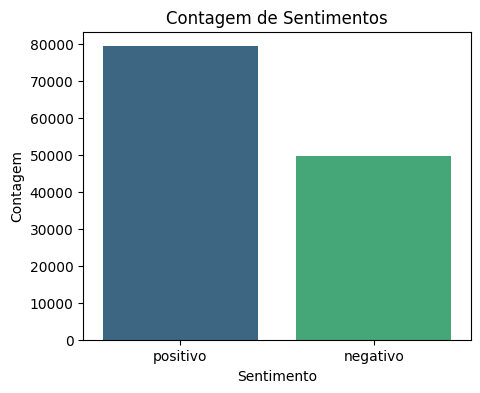

In [23]:
#Contagem de sentimentos positivos e negativos
contagem_sentimento = df['sentimento'].value_counts()
plt.figure(figsize=(5, 4))
sns.barplot(x=contagem_sentimento.index, y=contagem_sentimento.values, palette='viridis')
plt.title('Contagem de Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

In [24]:
#One-Hot-Encoding
df[['negativo', 'positivo']] = pd.get_dummies(df['sentimento'])

In [50]:
df[['sentimento', 'negativo', 'positivo']][12:16]

,sentimento,negativo,positivo
12,positivo,0,1
13,negativo,1,0
14,positivo,0,1
15,negativo,1,0


In [25]:
df.head()

,overall_rating,review_text,sentimento,negativo,positivo
0,4,Estou contente com a compra entrega rápida o ú...,positivo,0,1
1,4,"Por apenas R$1994.20,eu consegui comprar esse ...",positivo,0,1
2,4,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,positivo,0,1
3,4,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,positivo,0,1
4,5,"A entrega foi no prazo, as americanas estão de...",positivo,0,1


In [26]:
#Separando as variáveis
X = df['review_text']
y = df[['negativo', 'positivo']]

In [27]:
#Media de palavras por avaliação
round(sum([len(i.split()) for i in X])/len(X))

23

In [28]:
#Vetorizando os comentários
vectorizer = TextVectorization(max_tokens=None,
                               output_sequence_length=23,
                               output_mode='int')

In [29]:
vectorizer.adapt(X.values)

In [30]:
vectorized_text = vectorizer(X.values)

In [31]:
#Criando um exemplo de vetorização
exemplo = "Eu amei esse produto"
vectorizer([exemplo])

<tf.Tensor: shape=(1, 23), dtype=int64, numpy=
array([[ 32, 150,  65,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [32]:
#Valores únicos no dicionário
words_in_vocab = vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] #Palavras mais comuns ([UNK] representa palavras desconhecidas)
print(f"Número de palavras no vocabulário: {len(words_in_vocab)}")
print(f"5 palavras mais comuns: {top_5_words}")

Número de palavras no vocabulário: 67992
5 palavras mais comuns: ['', '[UNK]', 'o', 'e', 'a']


##DATALOADER

In [33]:
#Criando a base de dados para o modelo
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(32)
dataset = dataset.prefetch(8) # helps bottlenecks

In [34]:
#Separando a base de dados em 3: treino, validação e teste
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))